In [1]:
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [14]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

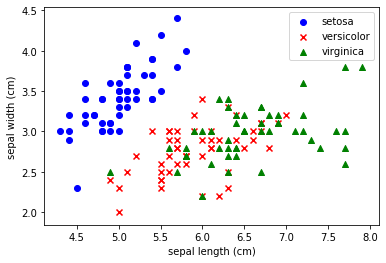

In [15]:
c_set = ['blue', 'red', 'green']
m_set = ['o', 'x', '^']
l_set = iris.target_names


for cnt in set(y):
    X_pts = [X[i, 0] for i in range(len(y)) if y[i] == cnt]
    y_pts = [X[i, 1] for i in range(len(y)) if y[i] == cnt]
    plt.scatter(X_pts, y_pts, color=c_set[cnt],\
                marker=m_set[cnt], label=l_set[cnt])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best')
plt.show()

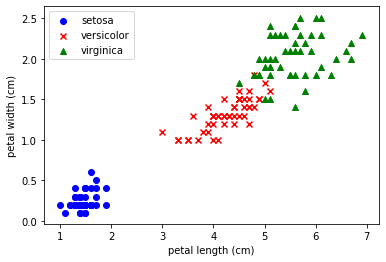

In [16]:
c_set = ['blue', 'red', 'green']
m_set = ['o', 'x', '^']
l_set = iris.target_names

for cnt in set(y):
    X_pts = [X[i, 2] for i in range(len(y)) if y[i] == cnt]
    y_pts = [X[i, 3] for i in range(len(y)) if y[i] == cnt]
    plt.scatter(X_pts, y_pts, color=c_set[cnt],\
                marker=m_set[cnt], label=l_set[cnt])

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend(loc='best')
plt.show()

In [17]:
X_ptls = X[:,2:4]
y_vgnc = (y==2).astype(np.int)

X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_ptls, y_vgnc, test_size=0.3, random_state=42)

In [18]:
model = linear_model.LogisticRegression(solver='liblinear')\
.fit(X_train,y_train)

In [19]:
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
report = metrics.classification_report(y_test,y_pred)

print(round(accuracy,3))
print(report)

0.956
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.93      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



In [22]:
confusion_mtx = metrics.confusion_matrix(y_test,y_pred)
print(confusion_mtx)

[[30  2]
 [ 0 13]]


In [9]:
# 다항 로지스틱 회귀 (=소프트맥스 회귀)
model = linear_model.LogisticRegression(multi_class='multinomial',\
solver='lbfgs').fit(X,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
